In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from tqdm.auto import tqdm
import shutil

In [9]:
! mkdir -p /root/.kaggle
! mv kaggle.json /root/.kaggle
import kaggle

'C:\Users\arvenka\init.cmd' is not recognized as an internal or external command,
operable program or batch file.
The syntax of the command is incorrect.
'C:\Users\arvenka\init.cmd' is not recognized as an internal or external command,
operable program or batch file.
'mv' is not recognized as an internal or external command,
operable program or batch file.


OSError: Could not find kaggle.json. Make sure it's located in C:\Users\arvenka\.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/

In [11]:
! kaggle competitions download -c dogs-vs-cats

'C:\Users\arvenka\init.cmd' is not recognized as an internal or external command,
operable program or batch file.
Traceback (most recent call last):
  File "C:\Users\arvenka\AppData\Local\anaconda3\envs\tensorflow\Scripts\kaggle-script.py", line 5, in <module>
    from kaggle.cli import main
  File "C:\Users\arvenka\AppData\Local\anaconda3\envs\tensorflow\Lib\site-packages\kaggle\__init__.py", line 7, in <module>
    api.authenticate()
  File "C:\Users\arvenka\AppData\Local\anaconda3\envs\tensorflow\Lib\site-packages\kaggle\api\kaggle_api_extended.py", line 407, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in C:\Users\arvenka\.kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [ ]:
! unzip -q dogs-vs-cats.zip
! unzip -q train.zip

In [ ]:
# Image Data Generator
# images
#   |-cat
#       |-cat.1.jpg
#       |- ...
#   |-dog
#       |-dog.1.jpg
#       |- ...

In [10]:
# Create master and cateory folders
os.mkdir("images")
os.mkdir("images/dog")
os.mkdir("images/cat")
os.mkdir("test")

In [ ]:
# transfer images from Train folder to images/cat & images/dog
source = "train/"
dest_cat = "images/cat/"
dest_dog = "images/dog/"

for imageName in tqdm(os.listdir(source)):
  if imageName.startswith("dog"):
    shutil.copy(source + imageName, dest_dog)
  elif imageName.startswith("cat"):
    shutil.copy(source + imageName, dest_cat)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
len(os.listdir(dest_dog)), len(os.listdir(dest_cat))

(12500, 12500)

In [ ]:
# Test Data set
test_dog = np.random.choice(os.listdir(dest_dog), 500, replace=False)
test_cat = np.random.choice(os.listdir(dest_cat), 500, replace=False)

for imageName in test_dog:
  shutil.move(dest_dog + imageName, "test/")
for imageName in test_cat:
  shutil.move(dest_cat + imageName, "test/")

In [ ]:
len(os.listdir(dest_dog)), len(os.listdir(dest_cat))

(12000, 12000)

In [ ]:
len(os.listdir("test/"))

1000

In [ ]:
# Image Data Generator
idg = tf.keras.preprocessing.image.ImageDataGenerator(horizontal_flip=True,
                                                      rotation_range=30,
                                                      rescale=1/255.0,
                                                      validation_split=0.1)

In [ ]:
batch_size = 64

In [ ]:
train_idg = idg.flow_from_directory("images", target_size=(150, 150),
                                    batch_size = batch_size,
                                    subset="training",)

Found 21600 images belonging to 2 classes.


In [ ]:
val_idg = idg.flow_from_directory("images", target_size=(150, 150),
                                  batch_size = batch_size,
                                  subset="validation")

Found 2400 images belonging to 2 classes.


In [ ]:
# del model

In [ ]:
# Modelling -
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((150,150,3), name="Input"))
# 1st chunk
model.add(tf.keras.layers.Conv2D(filters=16,
                                 kernel_size=(3,3),
                                 padding="valid",
                                 strides=(1,1),
                                 activation="relu",
                                 name="Conv1", ))
# (150, 150, 3), (3,3) --> (150 - 3 + 1)/1 = 148 = (148, 148, 16)
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                       strides =(2,2),
                                       padding="valid",
                                       name="Pool1"))
# 148 --> 74 ==> (74, 74, 16)
# 2nd Chunk
model.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3,3),
                                 padding="valid",
                                 strides=(1,1),
                                 activation="relu",
                                 name="Conv2"))
# (74, 74, 16) , (3,3) --> (74 - 3 + 1)/1 = 72 = (72, 72, 32)
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                       strides=(2,2),
                                       padding="valid",
                                       name="Pool2"))
# (72, 72, 32) --> 36 = (36, 36, 32)
# 3rd Chunk
model.add(tf.keras.layers.Conv2D(filters=32,
                                 kernel_size=(3,3),
                                 padding="valid",
                                 strides=(1,1),
                                 activation="relu",
                                 name="Conv3"))
# (36, 36, 32), (3,3) --> 36 -3 + 1 = 34 = (34, 34, 32)
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),
                                       strides=(2,2),
                                       padding="valid",
                                       name="Pool3"))
# (34, 34, 32) --> (17, 17, 32)
model.add(tf.keras.layers.Flatten(name="Flat"))
model.add(tf.keras.layers.Dense(64, activation="relu", name="Dense1"))
model.add(tf.keras.layers.Dense(2, activation="softmax", name="Output"))

In [ ]:
#Original Image
150 * 150 * 3

67500

In [ ]:
# Conv Image
17 * 17 * 32

9248

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 148, 148, 16)      448       
                                                                 
 Pool1 (MaxPooling2D)        (None, 74, 74, 16)        0         
                                                                 
 Conv2 (Conv2D)              (None, 72, 72, 32)        4640      
                                                                 
 Pool2 (MaxPooling2D)        (None, 36, 36, 32)        0         
                                                                 
 Conv3 (Conv2D)              (None, 34, 34, 32)        9248      
                                                                 
 Pool3 (MaxPooling2D)        (None, 17, 17, 32)        0         
                                                                 
 Flat (Flatten)              (None, 9248)              0

In [ ]:
# In Conv1 we have 16 filters and each filter as 9 (3x3) values
16 * 9

144

In [ ]:
# we will have filters for each channel
# 16 (no of filter) * 9 (value in each filter) * 3 (channels)
16 * 9 * 3

432

In [ ]:
# With each filter we have a bias
432 + 16

448

In [ ]:
# Conv2 = 32 * (3*3) * 16

In [ ]:
# Conv3 = 32 * (3*3) * 32

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics = ["acc"])

In [ ]:
model.fit(train_idg, epochs=10, batch_size=batch_size, validation_data=val_idg)

Epoch 1/10
338/338 [==============================] - 168s 465ms/step - loss: 0.6858 - acc: 0.5550 - val_loss: 0.6721 - val_acc: 0.6179
Epoch 2/10
338/338 [==============================] - 152s 451ms/step - loss: 0.6681 - acc: 0.5920 - val_loss: 0.6513 - val_acc: 0.6187
Epoch 3/10
338/338 [==============================] - 149s 439ms/step - loss: 0.6537 - acc: 0.6064 - val_loss: 0.6431 - val_acc: 0.6208
Epoch 4/10
338/338 [==============================] - 152s 451ms/step - loss: 0.6348 - acc: 0.6376 - val_loss: 0.6065 - val_acc: 0.6729
Epoch 5/10
338/338 [==============================] - 150s 443ms/step - loss: 0.6135 - acc: 0.6621 - val_loss: 0.6119 - val_acc: 0.6496
Epoch 6/10
338/338 [==============================] - 153s 452ms/step - loss: 0.5956 - acc: 0.6798 - val_loss: 0.5750 - val_acc: 0.6988
Epoch 7/10
 88/338 [======>.......................] - ETA: 1:39 - loss: 0.5828 - acc: 0.6998

KeyboardInterrupt: ignored

(1, 150, 150, 3)

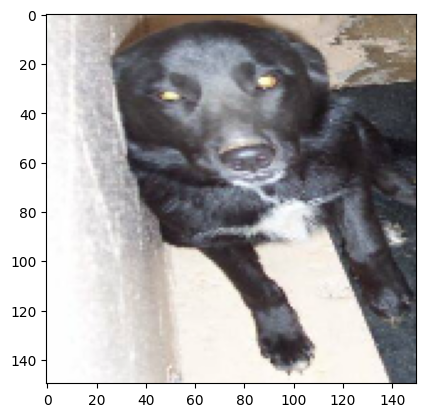

In [ ]:
# Images in Test
test_image = "test/dog.10000.jpg"
test_image = cv2.imread(test_image)
test_image = cv2.resize(test_image, (150, 150))
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plt.imshow(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image = test_image / 255.0
test_image.shape

In [ ]:
model.predict(test_image)

1/1 [==============================] - 0s 18ms/step


array([[0.2525529 , 0.74744713]], dtype=float32)

In [ ]:
train_idg.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
test_results = {}
for imageName in tqdm(os.listdir("test/")):
  test_image = "test/" + imageName
  test_image = cv2.imread(test_image)
  test_image = cv2.resize(test_image, (150, 150))
  test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
  # plt.imshow(test_image)
  test_image = np.expand_dims(test_image, axis=0)
  test_image = test_image / 255.0
  result = model.predict(test_image)
  test_results[imageName] = result

In [ ]:
test_results

In [ ]:
X_test = []
for imageName in tqdm(os.listdir("test/")):
  test_image = "test/" + imageName
  test_image = cv2.imread(test_image)
  test_image = cv2.resize(test_image, (150, 150))
  test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
  # plt.imshow(test_image)
  # test_image = np.expand_dims(test_image, axis=0)
  test_image = test_image / 255.0
  X_test.append(test_image)
X_test = np.array(X_test)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
X_test.shape

(1000, 150, 150, 3)

In [ ]:
model.predict(X_test)

32/32 [==============================] - 0s 10ms/step


array([[0.39618748, 0.6038125 ],
       [0.48081487, 0.5191851 ],
       [0.5871131 , 0.41288698],
       ...,
       [0.23423672, 0.76576334],
       [0.3754685 , 0.6245315 ],
       [0.5872359 , 0.41276404]], dtype=float32)